1. Data Preprocessing
- **Dataset**: Kaggle dataset (`data.csv`).
- **Tasks**:
  - Inspected the dataset for missing values and anomalies using `data.isnull().sum()`.
  - Conducted exploratory data analysis (EDA) to understand feature relationships via correlation matrices.
  - Balanced the dataset using **SMOTE** (Synthetic Minority Oversampling Technique).

In [1]:
import pandas as pd

# Load dataset into a DataFrame
data = pd.read_csv('data.csv')

# Display the first few rows to inspect the data
data 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [2]:
data.shape


(7043, 21)

In [3]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(0, inplace=True)

C:\Users\mubin\AppData\Local\Temp\ipykernel_5244\4213901256.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(0, inplace=True)


In [4]:
data = data.drop('customerID', axis=1)
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
data = data.drop_duplicates()
data


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [6]:
data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0})
data['gender'] = data['gender'].replace({'Male': 1, 'Female': 0})

C:\Users\mubin\AppData\Local\Temp\ipykernel_5244\3788102729.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0})
C:\Users\mubin\AppData\Local\Temp\ipykernel_5244\3788102729.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace({'Male': 1, 'Female': 0})


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int64  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

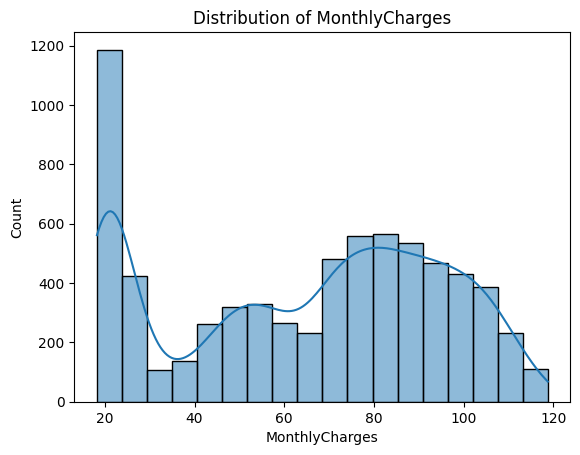

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data['MonthlyCharges'], kde=True)
plt.title('Distribution of MonthlyCharges')
plt.show()

In [9]:
data['HighPayer'] = data['MonthlyCharges'] > data['MonthlyCharges'].median()

In [10]:
data = pd.get_dummies(data, drop_first=True)

In [11]:
data.isnull().sum()

gender                                   0
SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
HighPayer                                0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

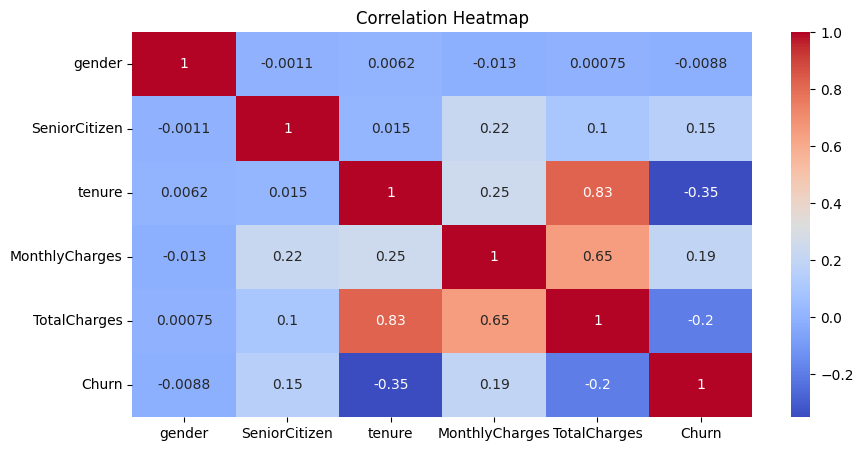

In [12]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
data['Churn'].value_counts(normalize=True)

Churn
0    0.735508
1    0.264492
Name: proportion, dtype: float64

In [14]:
# Recalculate the correlation matrix with 'Churn' as a numerical column
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

# Now find the correlation between 'Churn' and other numerical features
correlation_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)
print(correlation_with_churn)


Churn             1.000000
MonthlyCharges    0.194508
SeniorCitizen     0.151619
gender           -0.008763
TotalCharges     -0.197198
tenure           -0.351508
Name: Churn, dtype: float64


In [15]:
from sklearn.model_selection import train_test_split
X = data.drop(columns= 'Churn')
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 ### 2. Model Training and Evaluation
#### **Logistic Regression**
- Resampled training data using **SMOTE** to address class imbalance.
- Trained a **Logistic Regression** model with a maximum iteration limit of 2000.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Fit the model
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = LogisticRegression()

model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model with metrics suitable for binary classification (or adjust for multi-class if needed)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"Accuracy: {accuracy}")
print(f"Precision (weighted): {precision}")
print(f"Recall (weighted): {recall}")
print(f"F1 Score (weighted): {f1}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7644128113879004
Precision (weighted): 0.7946659053487013
Recall (weighted): 0.7644128113879004
F1 Score (weighted): 0.7742704396854905
Confusion Matrix:
[[829 224]
 [107 245]]


d:\WorkSpace\telecom_customer_churn\Telecom-Customer-Churn\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### **Random Forest Classifier**
- Conducted hyperparameter tuning with **GridSearchCV**:
  - Parameters tuned: `n_estimators`, `max_depth`, `min_samples_split`.
  - Best model selected with optimal parameters.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc_model = RandomForestClassifier(class_weight='balanced')
rfc_model.fit(X_train_smote, y_train_smote)



RandomForestClassifier(class_weight='balanced')

In [28]:
print("training accuracy = ", rfc_model.score(X_train_smote, y_train_smote))

print("Test accuracy = ", rfc_model.score(X_test, y_test))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(confusion_matrix(y_test, y_pred))

training accuracy =  0.9981756263682803
Test accuracy =  0.7807829181494662
Precision: 0.5223880597014925
Recall: 0.6960227272727273
F1 Score: 0.5968331303288672
[[829 224]
 [107 245]]


### GridSearchCV

In [29]:

# Parameter Grid 
param_grid = {
    'n_estimators' : [150, 250, 300],
    'max_depth' : [None, 20, 30,40],
    'min_samples_split' : [4, 8, 12]
}

# Grid Search
grid_search_rfc = GridSearchCV(rfc_model, param_grid, cv=6)
grid_search_rfc.fit(X_train_smote, y_train_smote)
best_rfc_model = grid_search_rfc.best_estimator_

 3. Visualization
- Generated a **learning curve** to evaluate model training and cross-validation performance across different training set sizes.
- Plotted the accuracy with standard deviation for training and validation sets.


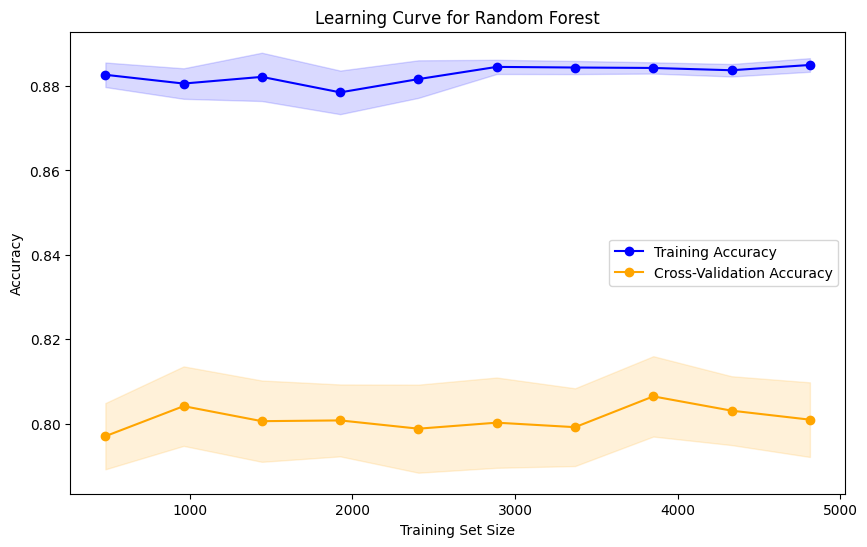

In [20]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Compute learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_rfc_model, X_train, y_train, cv=7, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Accuracy")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Cross-Validation Accuracy")

# Shade the areas between +/- standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color="orange")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.title("Learning Curve for Random Forest")
plt.show()


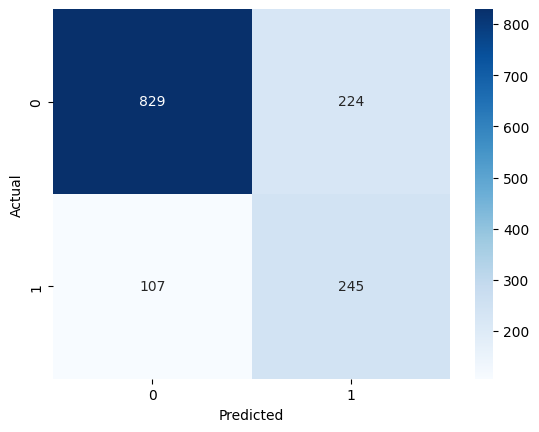

In [21]:
from sklearn.metrics import confusion_matrix, roc_auc_score
import seaborn as sns
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [41]:
print("training accuracy = ", best_rfc_model.score(X_train, y_train))

print("Test accuracy = ", best_rfc_model.score(X_test, y_test))

training accuracy =  0.9743589743589743
Test accuracy =  0.7793594306049823


### XGBOOST Classifier


In [34]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=True, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
print("XGBoost Test Accuracy:", xgb_model.score(X_test, y_test))


d:\WorkSpace\telecom_customer_churn\Telecom-Customer-Churn\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Test Accuracy: 0.7722419928825622
